In [1]:
import pandas as pd
import os

def read_csv_files(directory, file_extension):
    dfs = []

    for filename in os.listdir(directory):
        if filename.endswith(file_extension):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    
    return combined_df

directory = 'data/'
combined_df = read_csv_files(directory, '2009.csv')


In [2]:
copy_df = combined_df.copy()

In [3]:
def display_dataframe_info(df):
    pd.set_option('display.max_columns', None)
    print("Basic information about the DataFrame:")
    print(df.info())

    print("\nSummary statistics of the DataFrame:")
    print(df.describe())

    print("\nFirst few rows of the DataFrame:")
    print(df.head())

In [4]:
import numpy as np
def clean_data(df):
    df = df.drop_duplicates()
    #if df['Unamed: 27']:
    df.drop('Unnamed: 27', axis=1, inplace=True)

    specific_columns = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
    df[specific_columns] = df[specific_columns].fillna(0.0)

    numerical_columns = df.select_dtypes(include=['number']).columns
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].mean())

    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        mode_value = df[col].mode()
        if not mode_value.empty:
            df[col] = df[col].fillna(mode_value[0])

    z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())
    df = df[(z_scores < 3).all(axis=1)]
    df = df.dropna()

    return df

In [5]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

def convert_to_numeric(df):
    date_cols = df.select_dtypes(include=['datetime64']).columns
    reference_date = datetime(1970, 1, 1)
    for col in date_cols:
        df[col] = (df[col] - reference_date).dt.days

    label_encoder = LabelEncoder()
    string_cols = df.select_dtypes(include=['object']).columns
    for col in string_cols:
        df[col] = label_encoder.fit_transform(df[col])
        
    df = df.drop(columns=string_cols)

    return df

In [6]:
import matplotlib.pyplot as plt

def select_top_correlated_features(df, target_column, num_features=5):
    numeric_df = df.select_dtypes(include=['number'])

    corr_matrix = numeric_df.corr()
    corr_with_target = corr_matrix[target_column].abs().sort_values(ascending=False)
    
    top_correlated_features = corr_with_target.drop(target_column)[:num_features]
    
    selected_feature_names = top_correlated_features.index.tolist()
    selected_feature_names.append(target_column)
    selected_df = df[selected_feature_names]

    selected_df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()

    return selected_df

In [7]:
from sklearn.preprocessing import StandardScaler

def scale_data(df):
    numeric_df = df.select_dtypes(include=['number'])
    scaler = StandardScaler()

    scaled_data = scaler.fit_transform(numeric_df)
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns, index=df.index)

    for column in df.columns:
        if column not in numeric_df.columns:
            scaled_df[column] = df[column]

    return scaled_df

C:\Users\Endżi\AppData\Local\Temp\ipykernel_12296\2550831973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Unnamed: 27', axis=1, inplace=True)
C:\Users\Endżi\AppData\Local\Temp\ipykernel_12296\2550831973.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[specific_columns] = df[specific_columns].fillna(0.0)
C:\Users\Endżi\AppData\Local\Temp\ipykernel_12296\2550831973.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

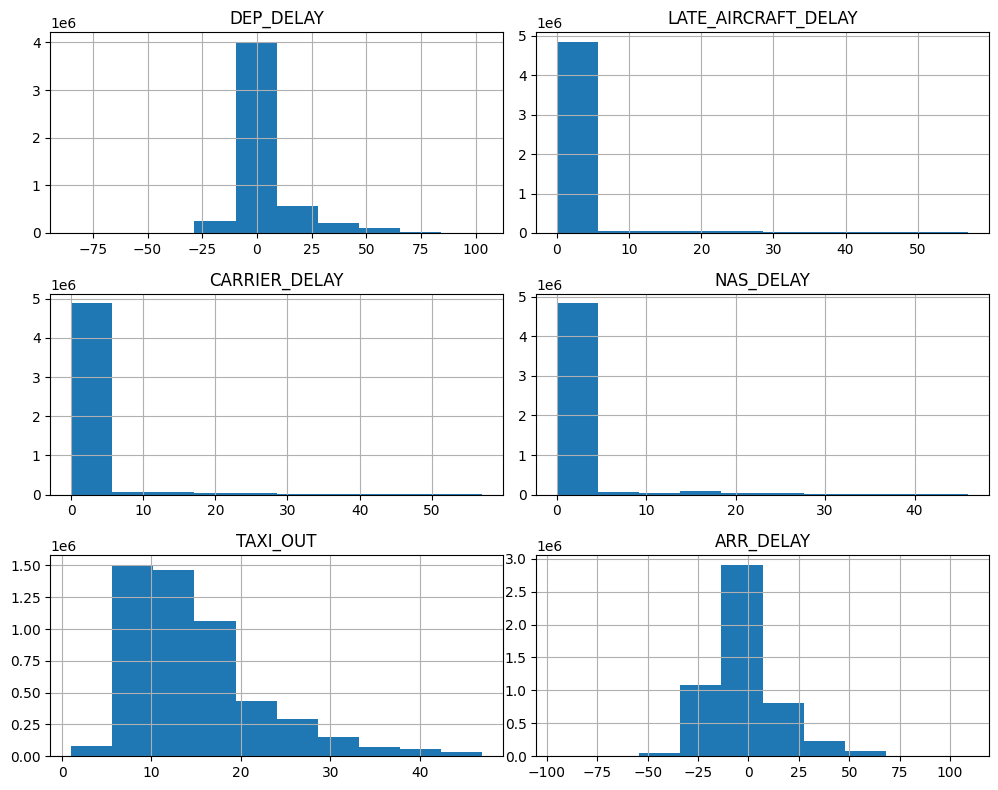

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 5149140 entries, 0 to 6429337
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DEP_DELAY            float64
 1   LATE_AIRCRAFT_DELAY  float64
 2   CARRIER_DELAY        float64
 3   NAS_DELAY            float64
 4   TAXI_OUT             float64
 5   ARR_DELAY            float64
dtypes: float64(6)
memory usage: 275.0 MB
None

Summary statistics of the DataFrame:
          DEP_DELAY  LATE_AIRCRAFT_DELAY  CARRIER_DELAY     NAS_DELAY  \
count  5.149140e+06         5.149140e+06   5.149140e+06  5.149140e+06   
mean  -1.501358e-18        -4.583559e-17   3.179347e-18  2.251486e-17   
std    1.000000e+00         1.000000e+00   1.000000e+00  1.000000e+00   
min   -6.515983e+00        -2.205907e-01  -2.057334e-01 -2.321697e-01   
25%   -5.398119e-01        -2.205907e-01  -2.057334e-01 -2.321697e-01   
50%   -3.157055e-01        -2.205907e-01  -2.057334e-01 -2.

In [8]:
def prepare_data(df):
    #display_dataframe_info(df)

    cleaned_df = clean_data(df)
    cleaned_df.head()

    converted_df = convert_to_numeric(cleaned_df)
    #display_dataframe_info(cleaned_df)

    selected_features_df = select_top_correlated_features(converted_df, 'ARR_DELAY', 5)
    
    scaled_df = scale_data(selected_features_df)
    display_dataframe_info(scaled_df)

prepare_data(copy_df)

In [9]:
copy_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def display_piechart(counts, title):
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  
    plt.show()

In [12]:
def get_delay_type(row):
    if row['CARRIER_DELAY'] == 1:
        return 'CARRIER'
    elif row['WEATHER_DELAY'] == 1:
        return 'WEATHER'
    elif row['NAS_DELAY'] == 1:
        return 'NAS'
    elif row["SECURITY_DELAY"] == 1:
        return 'SECURITY'
    elif row['LATE_AIRCRAFT_DELAY'] ==1:
        return 'LATE_AIRCRAFT'
    else:
        return None

copy_df['DELAY_TYPE'] = copy_df.apply(get_delay_type, axis = 1)
copy_df.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis = 1, inplace = True)
copy_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Unnamed: 27,DELAY_TYPE
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,None
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,None
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,None
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,None
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,None


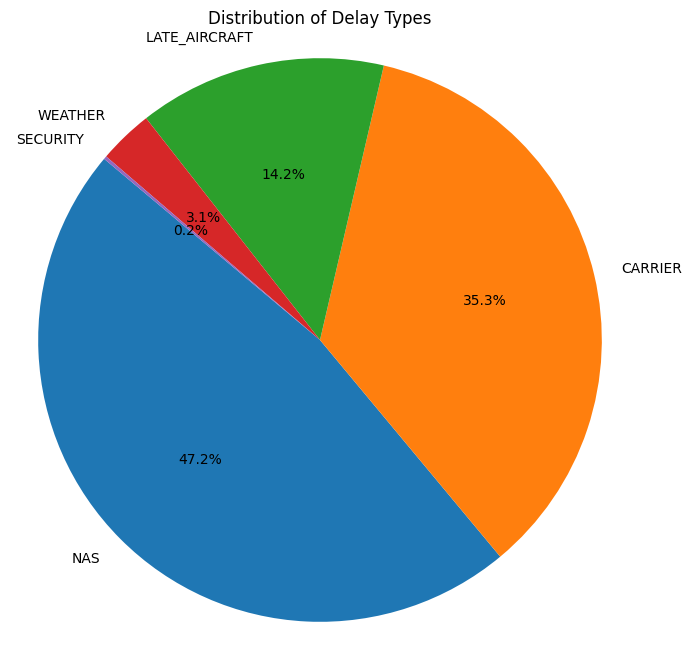

In [14]:
import matplotlib.pyplot as plt

delay_counts = copy_df['DELAY_TYPE'].value_counts()

display_piechart(delay_counts,'Distribution of Delay Types')


In [15]:
copy_df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

C:\Users\Endżi\AppData\Local\Temp\ipykernel_12296\4280511572.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_df['OP_CARRIER'].replace({


In [45]:
copy_df.drop('Unnamed: 27', axis =1, inplace = True)

In [52]:
copy_df['FL_DATE_month'] = pd.to_datetime(copy_df['FL_DATE']).dt.month


In [46]:
canceled_df = copy_df[(copy_df['CANCELLED'] != 0)]
canceled_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE,FL_DATE_month
879,2009-01-01,Mesa Airline,7104,DEN,CPR,2150,1326.026278,0.0,16.036133,1350.797551,1478.506331,6.894225,2312,1485.662159,4.285591,1.0,A,0.0,82.0,126.243427,103.325723,230.0,None,1
926,2009-01-01,Mesa Airline,7329,DTW,ORD,1857,1326.026278,0.0,16.036133,1350.797551,1478.506331,6.894225,1914,1485.662159,4.285591,1.0,A,0.0,77.0,126.243427,103.325723,235.0,None,1
935,2009-01-01,Mesa Airline,7065,EWR,IAD,1013,1326.026278,0.0,16.036133,1350.797551,1478.506331,6.894225,1139,1485.662159,4.285591,1.0,A,0.0,86.0,126.243427,103.325723,213.0,None,1
938,2009-01-01,Mesa Airline,2984,FAT,LAS,710,1326.026278,0.0,16.036133,1350.797551,1478.506331,6.894225,820,1485.662159,4.285591,1.0,B,0.0,70.0,126.243427,103.325723,258.0,None,1
941,2009-01-01,Mesa Airline,2823,FAT,PHX,920,1326.026278,0.0,16.036133,1350.797551,1478.506331,6.894225,1205,1485.662159,4.285591,1.0,B,0.0,105.0,126.243427,103.325723,493.0,None,1


In [47]:
delayed_df = copy_df[(copy_df['DELAY_TYPE'].notna())]
delayed_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE,FL_DATE_month
213,2009-01-01,XE,2304,IAH,GPT,1220,1234.0,14.0,17.0,1251.0,1344.0,6.0,1335,1350.0,15.0,0.0,NaN,0.0,75.0,76.0,53.0,376.0,NAS,1
553,2009-01-01,XE,2806,EWR,MCI,1450,1505.0,15.0,40.0,1545.0,1726.0,4.0,1714,1730.0,16.0,0.0,NaN,0.0,204.0,205.0,161.0,1092.0,NAS,1
1479,2009-01-01,NW,1765,PHL,DTW,921,1010.0,49.0,31.0,1041.0,1200.0,9.0,1119,1209.0,50.0,0.0,NaN,0.0,118.0,119.0,79.0,453.0,NAS,1
1562,2009-01-01,PSA Airlines,6448,CVG,DTW,835,908.0,33.0,16.0,924.0,1010.0,13.0,949,1023.0,34.0,0.0,NaN,0.0,74.0,75.0,46.0,229.0,NAS,1
1612,2009-01-01,PSA Airlines,6515,JFK,ORD,900,955.0,55.0,32.0,1027.0,1138.0,12.0,1054,1150.0,56.0,0.0,NaN,0.0,174.0,175.0,131.0,740.0,NAS,1


In [48]:
canceled_df['CANCELLATION_CODE'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

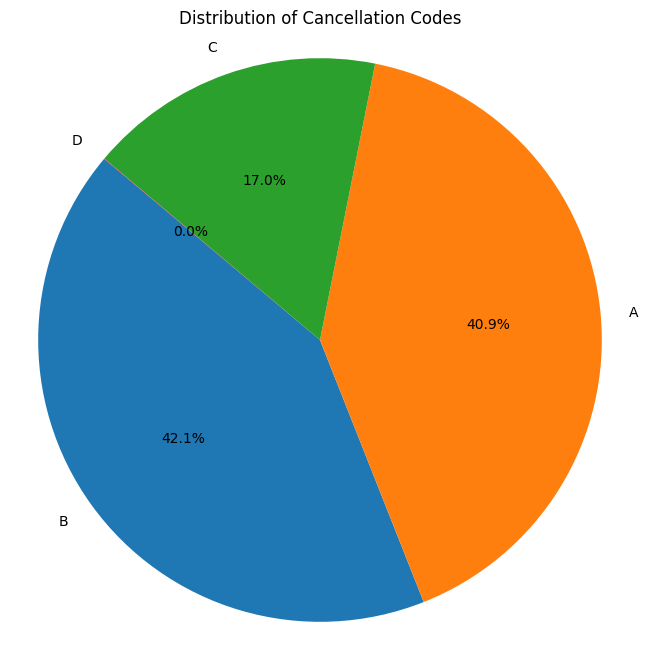

In [49]:
cancellation_codes = canceled_df['CANCELLATION_CODE'].value_counts()

display_piechart(cancellation_codes, 'Distribution of Cancellation Codes')


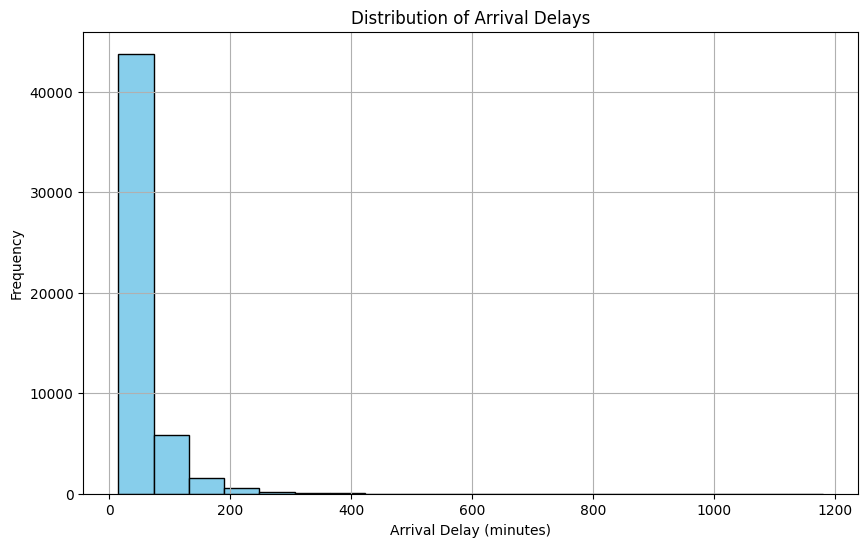

In [50]:

plt.figure(figsize=(10, 6))
plt.hist(delayed_df['ARR_DELAY'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

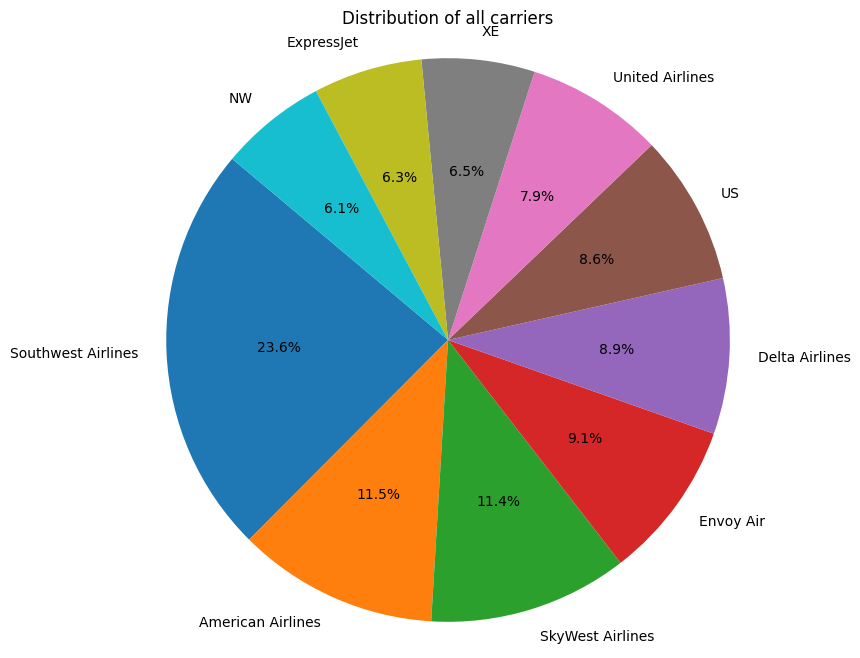

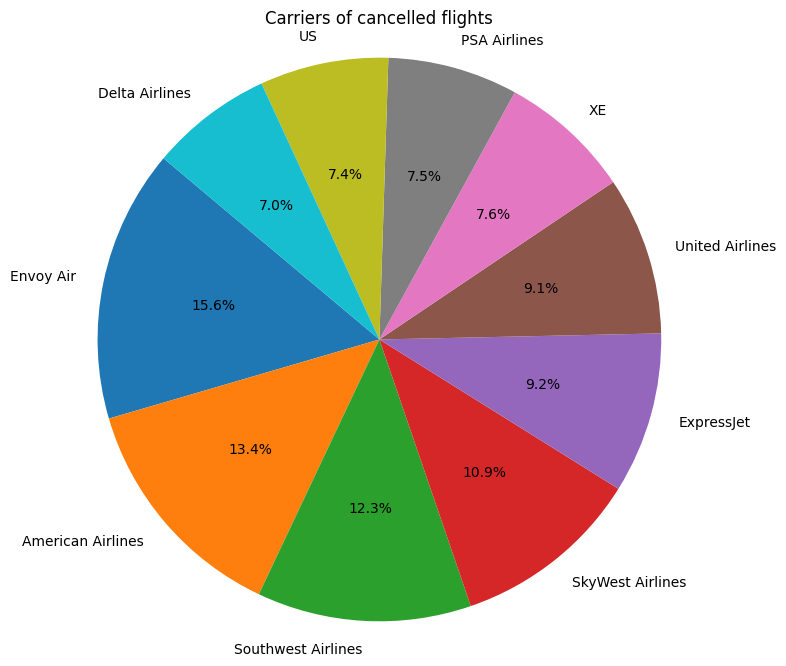

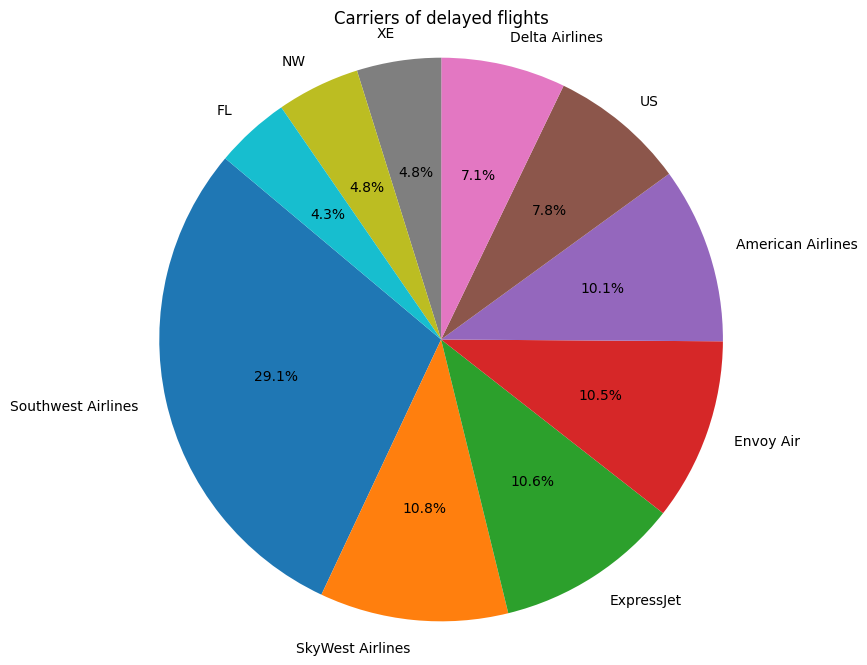

In [51]:
carriers_all = copy_df['OP_CARRIER'].value_counts()
carriers_canceled = canceled_df['OP_CARRIER'].value_counts()
carriers_delayed = delayed_df['OP_CARRIER'].value_counts()


plt.rcParams.update({'font.size': 10})
display_piechart(carriers_all[:10], 'Distribution of all carriers')

display_piechart(carriers_canceled[:10], 'Carriers of cancelled flights')

display_piechart(carriers_delayed[:10], 'Carriers of delayed flights')

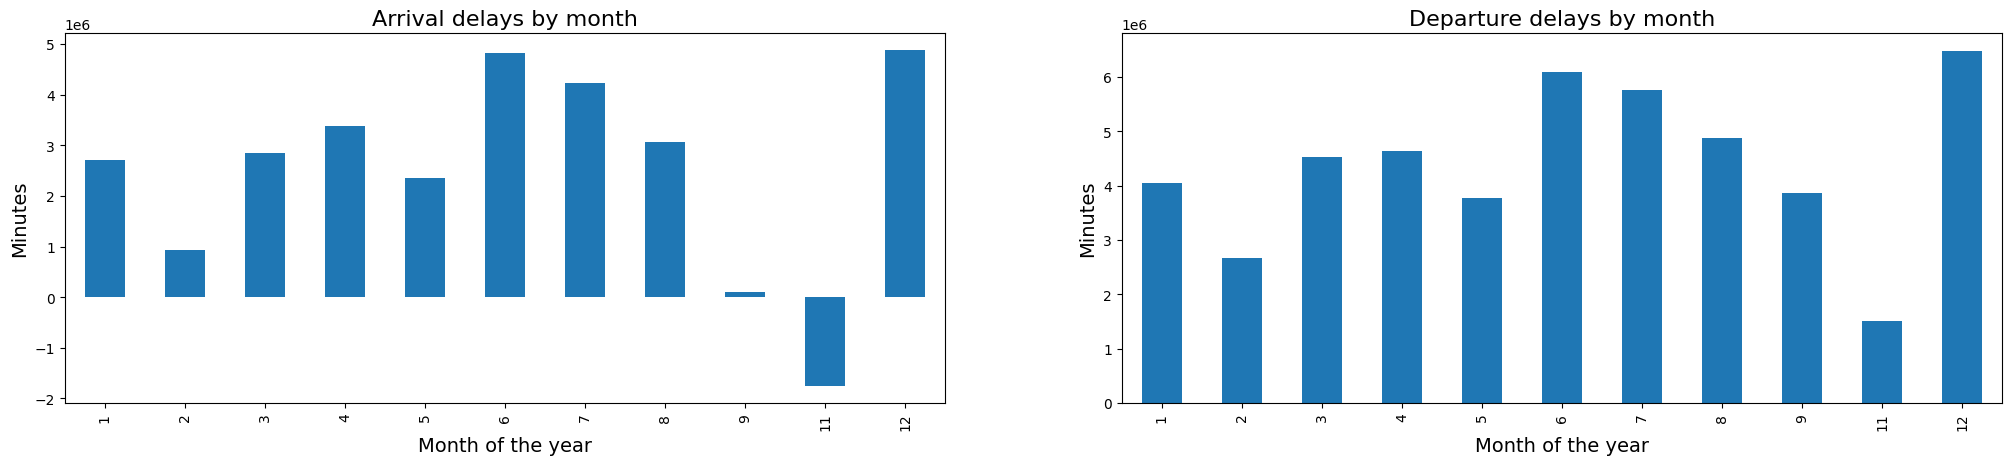

In [53]:
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
copy_df.groupby('FL_DATE_month').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('Arrival delays by month', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
copy_df.groupby('FL_DATE_month').DEP_DELAY.sum().plot.bar()
plt.title('Departure delays by month', fontsize=16)
plt.ylabel('Minutes', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

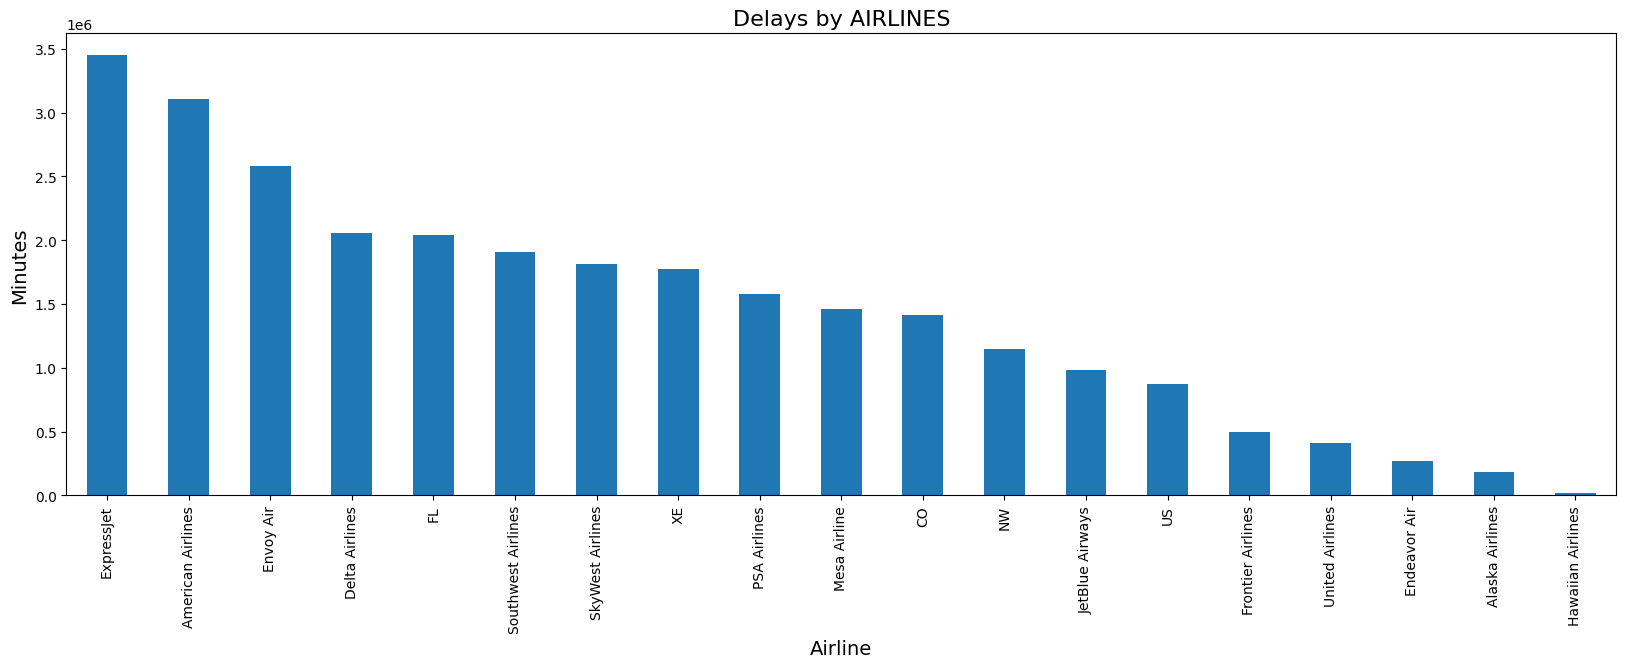

In [54]:
plt.figure(figsize=(20, 6))
copy_df.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('Delays by AIRLINES', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()

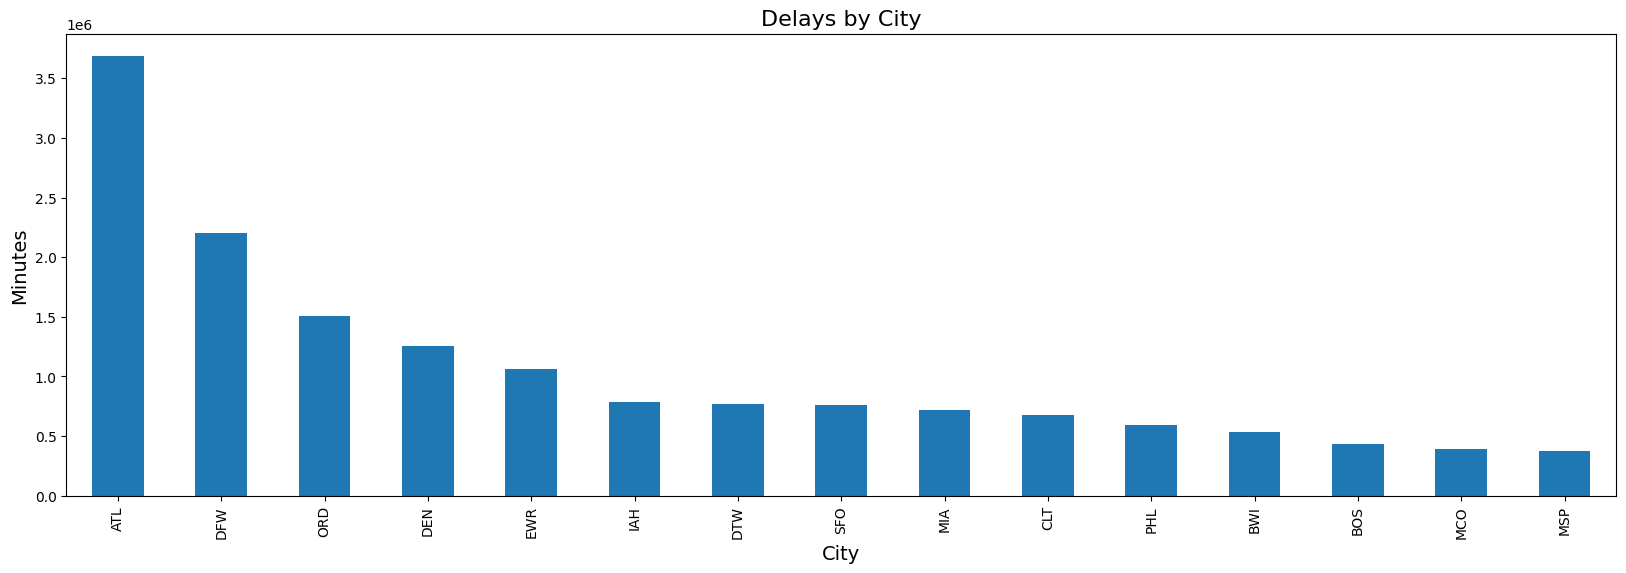

In [55]:
city_by_delay = copy_df.groupby('ORIGIN').ARR_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_delay[:15].plot.bar()
plt.title('Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()

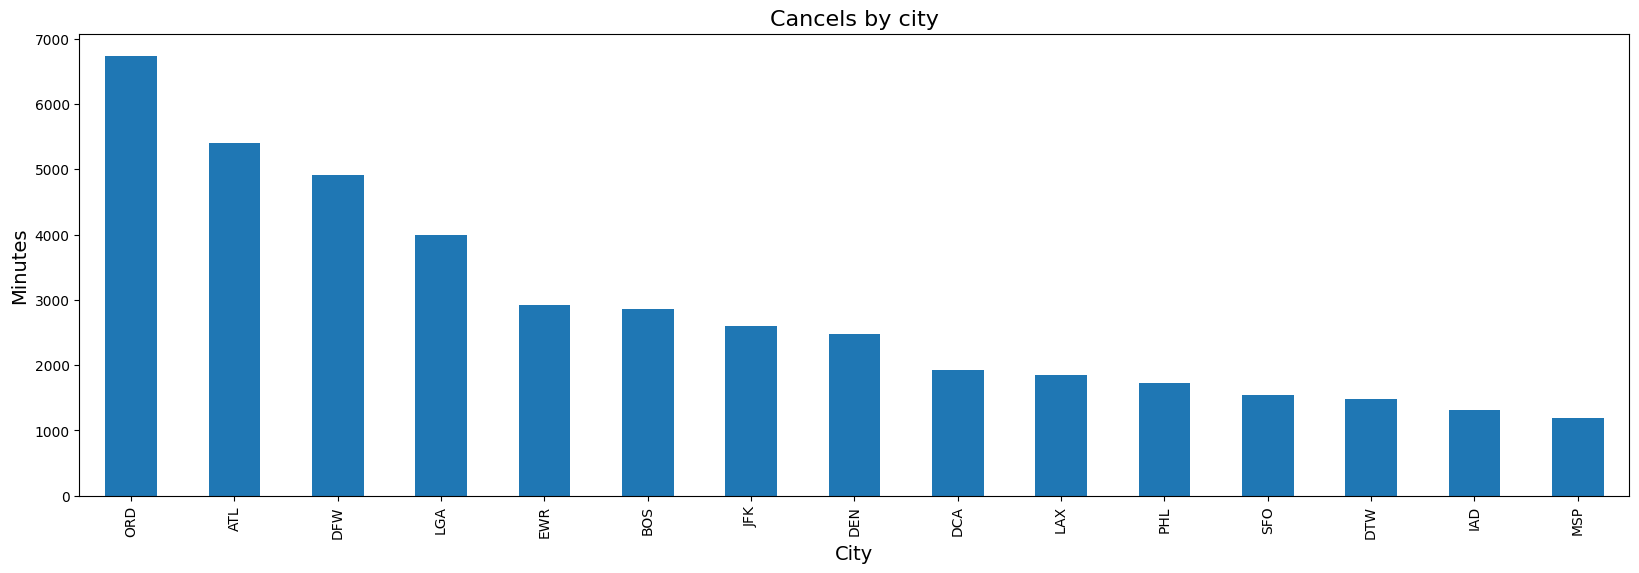

In [56]:
city_by_cancel = canceled_df.groupby('ORIGIN')['FL_DATE'].count().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
city_by_cancel[:15].plot.bar()
plt.title('Cancels by city', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.show()

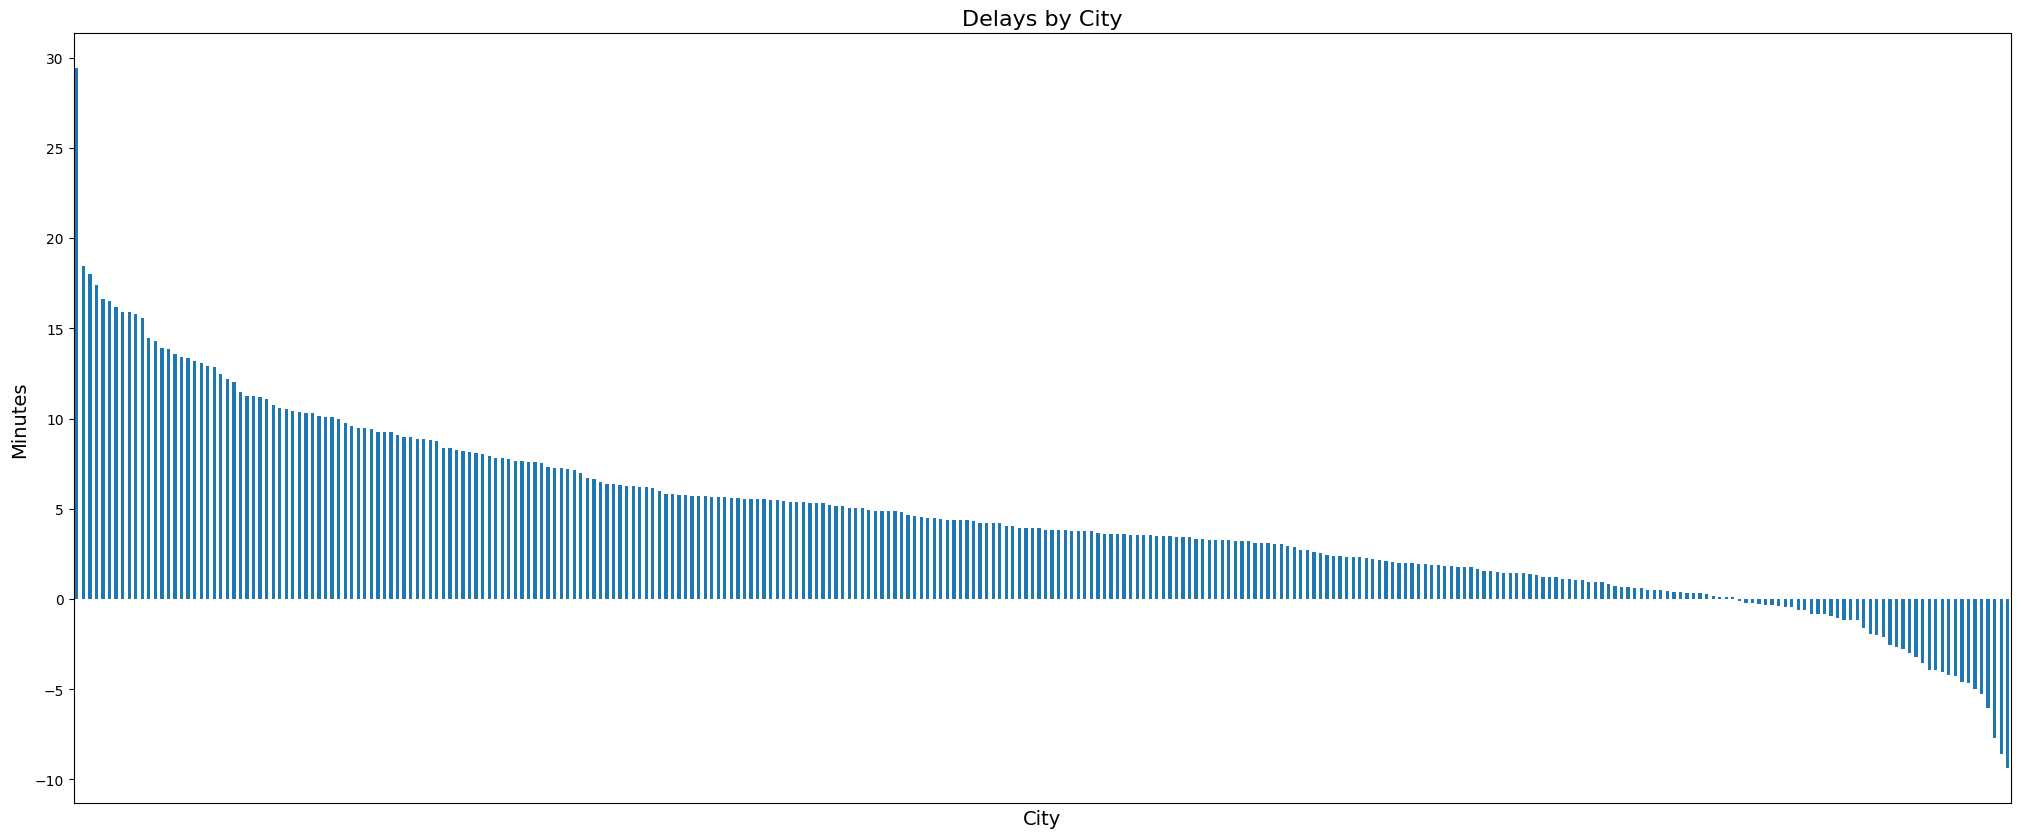

In [57]:
city_by_delay = copy_df.groupby('ORIGIN').ARR_DELAY.mean().sort_values(ascending=False)
plt.figure(figsize=(25, 10))
city_by_delay.plot.bar()
plt.title('Delays by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Minutes', fontsize=14)

plt.xticks([])
plt.show()

In [58]:
copy_df['DEP_DELAY'].fillna(0, inplace =True)

C:\Users\Endżi\AppData\Local\Temp\ipykernel_12296\2279944046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_df['DEP_DELAY'].fillna(0, inplace =True)


In [59]:
nans = copy_df[['DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'DEP_TIME', 'TAXI_IN']].isna().any(axis=1)

# Wydrukuj wiersze, które zawierają NaN w wybranych kolumnach
print("Wiersze zawierające NaN w wybranych kolumnach:")
print(copy_df[nans])

Wiersze zawierające NaN w wybranych kolumnach:
Empty DataFrame
Columns: [FL_DATE, OP_CARRIER, OP_CARRIER_FL_NUM, ORIGIN, DEST, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, CANCELLED, CANCELLATION_CODE, DIVERTED, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, AIR_TIME, DISTANCE, DELAY_TYPE, FL_DATE_month]
Index: []


In [60]:
numerical_columns = copy_df.select_dtypes(include=['number']).columns
print(numerical_columns)
copy_df.head()

Index(['OP_CARRIER_FL_NUM', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FL_DATE_month'],
      dtype='object')


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE,FL_DATE_month
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,None,1
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,None,1
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,None,1
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,None,1
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,None,1


In [61]:

for col in numerical_columns:
    copy_df[col] = copy_df[col].fillna(copy_df[col].mean())

nans = copy_df[['DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'DEP_TIME', 'TAXI_IN']].isna().any(axis=1)

# Wydrukuj wiersze, które zawierają NaN w wybranych kolumnach
print("NaN in columns:")
print(copy_df[nans])

NaN in columns:
Empty DataFrame
Columns: [FL_DATE, OP_CARRIER, OP_CARRIER_FL_NUM, ORIGIN, DEST, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, CANCELLED, CANCELLATION_CODE, DIVERTED, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, AIR_TIME, DISTANCE, DELAY_TYPE, FL_DATE_month]
Index: []


In [72]:


categorical_columns = copy_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    mode_value = copy_df[col].mode()
    if not mode_value.empty:
        copy_df[col] = copy_df[col].fillna('None')


In [73]:
copy_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE,FL_DATE_month
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,None,0.0,62.0,68.0,42.0,199.0,None,1
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,None,0.0,82.0,75.0,43.0,213.0,None,1
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,None,0.0,70.0,62.0,36.0,199.0,None,1
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,None,0.0,77.0,56.0,37.0,199.0,None,1
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,None,0.0,105.0,77.0,40.0,213.0,None,1


In [74]:
copy_df2 = copy_df.copy()

In [75]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

copy_df2['ORIGIN'] = label_encoder.fit_transform(copy_df2['ORIGIN'])
copy_df2['DELAY_TYPE'] = label_encoder.fit_transform(copy_df2['DELAY_TYPE'])

copy_df2.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_TYPE,FL_DATE_month
0,2009-01-01,XE,1204,79,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,None,0.0,62.0,68.0,42.0,199.0,3,1
1,2009-01-01,XE,1206,96,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,None,0.0,82.0,75.0,43.0,213.0,3,1
2,2009-01-01,XE,1207,96,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,None,0.0,70.0,62.0,36.0,199.0,3,1
3,2009-01-01,XE,1208,79,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,None,0.0,77.0,56.0,37.0,199.0,3,1
4,2009-01-01,XE,1209,134,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,None,0.0,105.0,77.0,40.0,213.0,3,1


In [78]:
copy_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429338 entries, 0 to 6429337
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               int32  
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  DELAY_TYPE           int32  
 23  FL_DATE_month        int32  
dty

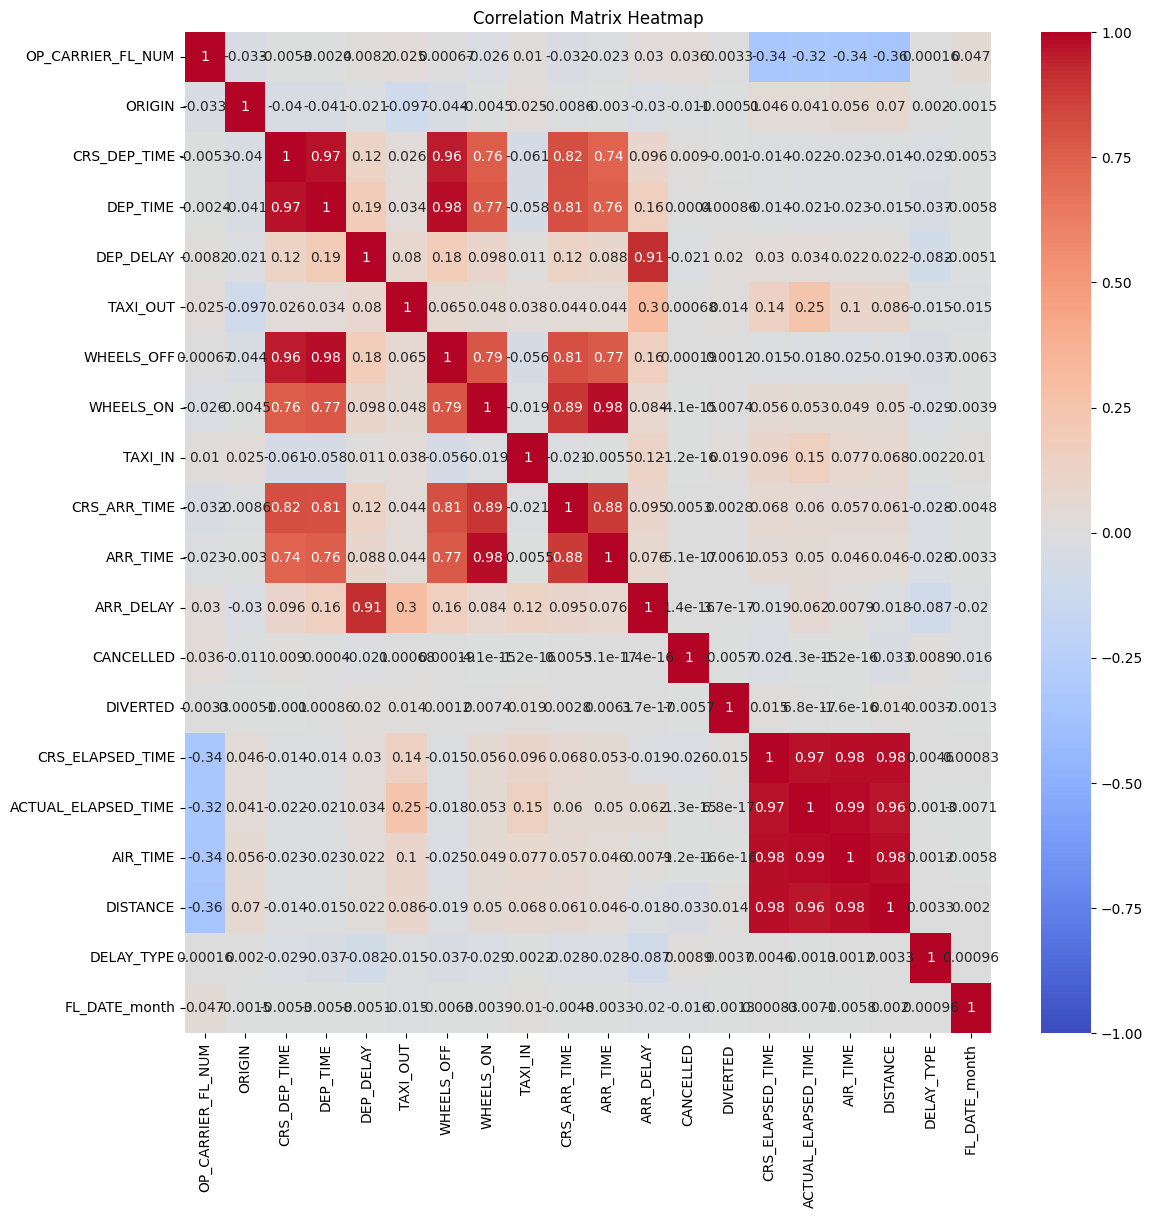

In [79]:
import seaborn as sns

numerical_columns = copy_df2.select_dtypes(include=['number']).columns
correlation_matrix = copy_df2[numerical_columns].corr()

plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Mean Squared Error: 122.63589131876509
R^2 Score: 0.8966338837654957


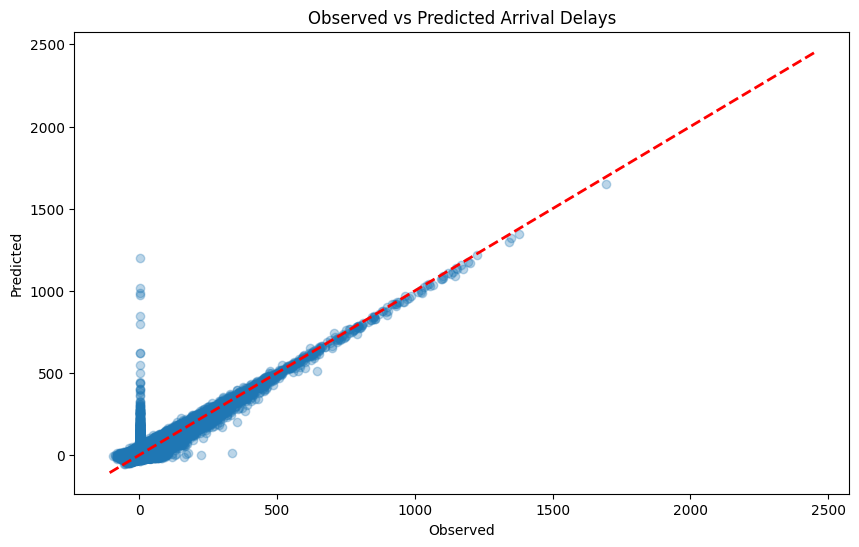

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


features = ['DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'DEP_TIME', 'TAXI_IN', 'FL_DATE_month', 'ORIGIN', 'DELAY_TYPE']
target = 'ARR_DELAY'

X = copy_df2[features]
y = copy_df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Arrival Delays')
plt.show()

KNN:
Mean Squared Error: 109.85394026754237
R^2 Score: 0.9074074071105513


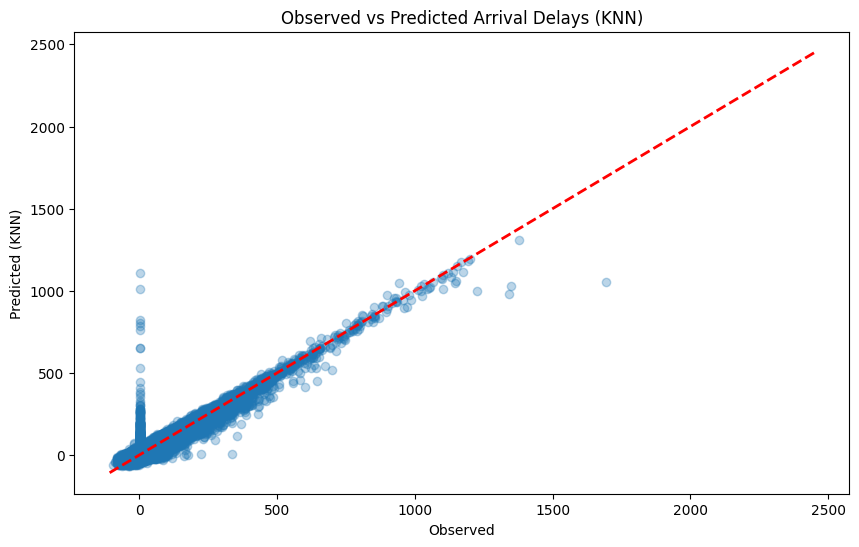

In [83]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)  

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN:")
print(f'Mean Squared Error: {mse_knn}')
print(f'R^2 Score: {r2_knn}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted (KNN)')
plt.title('Observed vs Predicted Arrival Delays (KNN)')
plt.show()

Lasso Regression:
Mean Squared Error: 122.77973199180009
R^2 Score: 0.8965126447744605


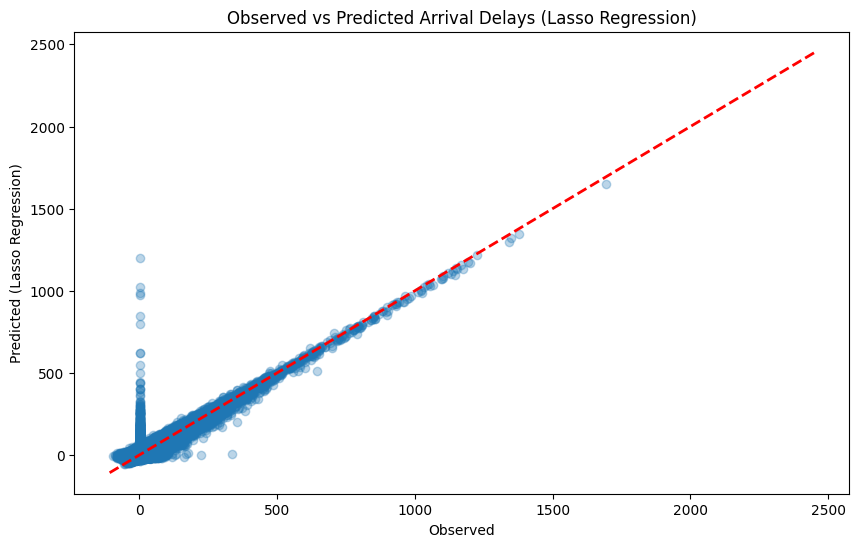

In [84]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  

lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f'Mean Squared Error: {mse_lasso}')
print(f'R^2 Score: {r2_lasso}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Observed')
plt.ylabel('Predicted (Lasso Regression)')
plt.title('Observed vs Predicted Arrival Delays (Lasso Regression)')
plt.show()